<h1 style="text-align: center">
Deep Learning HW4 </br>
VAE and CVAE
</h1>


### Full Name: Amirhossein Akbari
### Student ID: 99105901

# Import necessary libraries

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random
import torchvision

# Define the MNIST dataset and data loader

In [10]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

# Data Visualization

In [11]:
# Function to display an image
def show_image(image, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Function to show random images from each class
def show_random_images_from_each_class(dataset, num_images_per_class=4, figsize=(10, 20)):
    class_labels = list(range(10))  
    fig, axs = plt.subplots(len(class_labels), num_images_per_class, figsize=figsize) 

    for i, label in enumerate(class_labels):
        class_indices = [idx for idx, target in enumerate(dataset.targets) if target == label]
        random_indices = random.sample(class_indices, num_images_per_class)

        for j, idx in enumerate(random_indices):
            image, target = dataset[idx]
            axs[i, j].imshow(image[0], cmap='gray')
            axs[i, j].set_title(f"Class {label}", fontsize=16)
            axs[i, j].axis('off')
            axs[i, j].set_aspect('equal')  
            axs[i, j].grid(True)

    plt.tight_layout()
    plt.show()

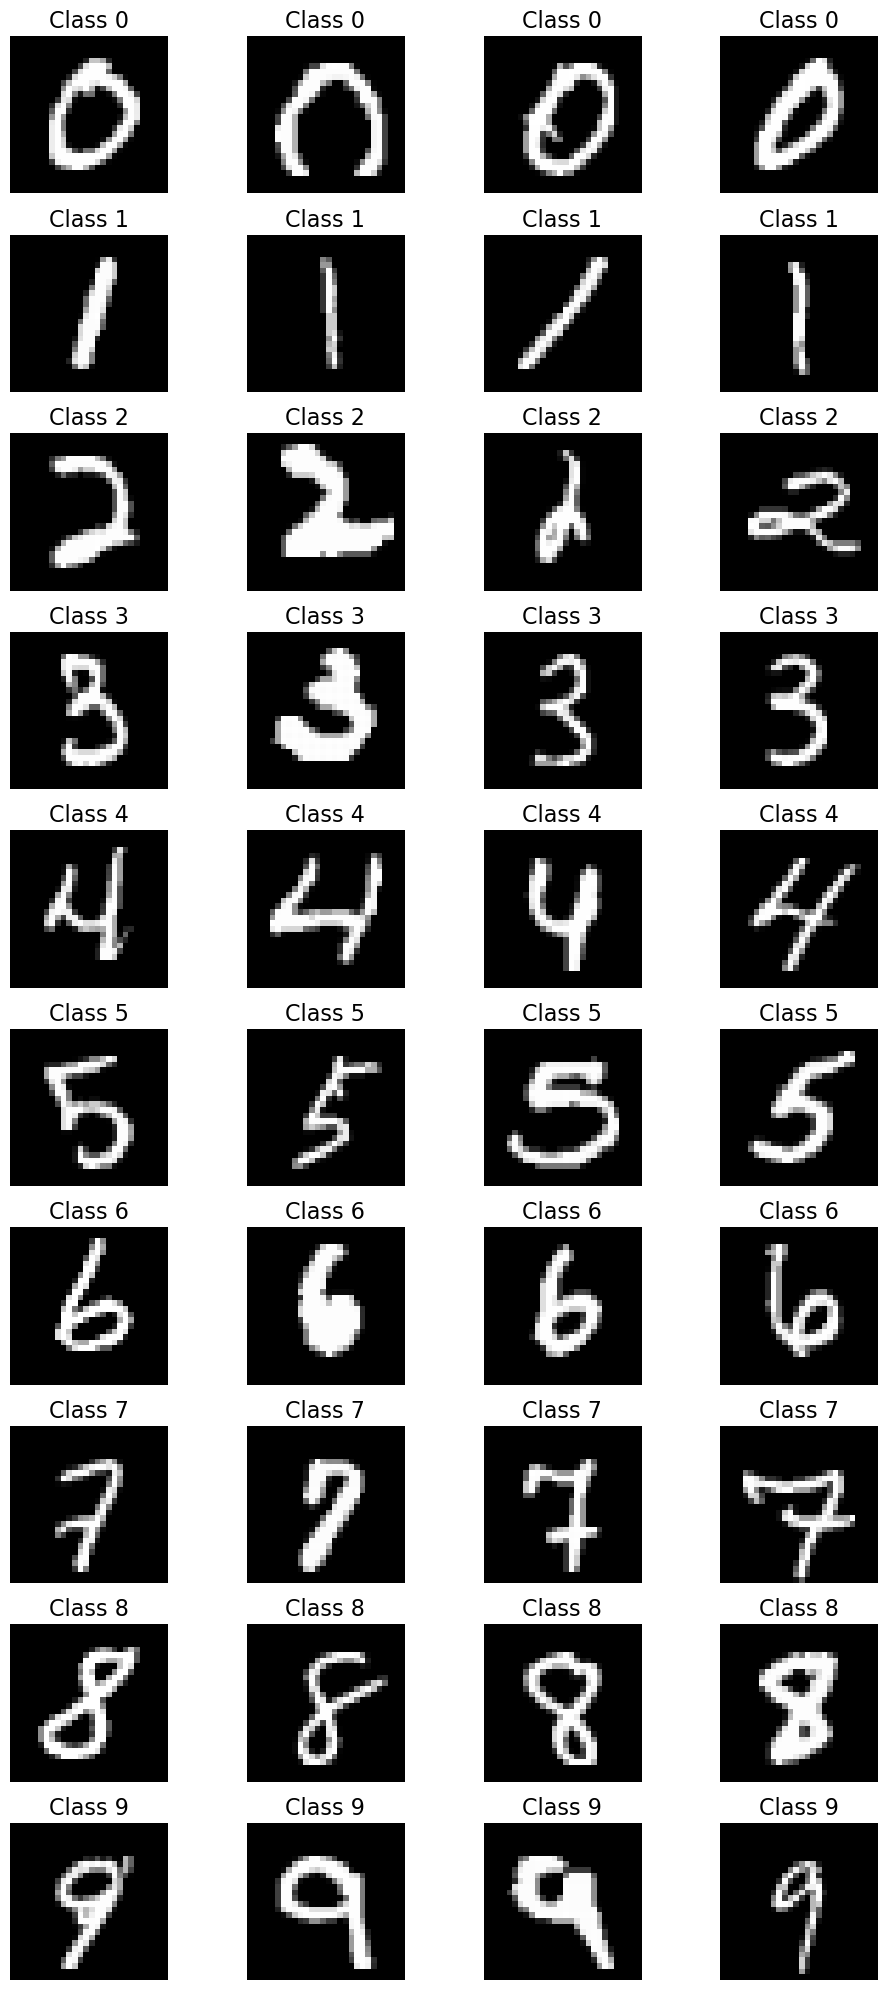

In [12]:
# Use the function to show random images from each class
show_random_images_from_each_class(train_dataset, num_images_per_class=4)

Exercise: Variational Autoencoders (VAE) and Conditional Variational Autoencoders (CVAE)

with MLP Architectures

In this exercise, we'll explore Variational Autoencoders (VAE) and Conditional VAE (CVAE) using PyTorch.

We will implement these models using Multi-Layer Perceptrons (MLP) 

Let's get started!

# 1) VAE --> MLP

In [13]:
# Define a simple VAE class with MLP architecture

# class VAE_MLP(nn.Module):
#     def __init__(self, input_dim, hidden_dim, latent_dim):
#         super(VAE_MLP, self).__init__()
#         # TODO: Define the architecture of the encoder and decoder
#         self.encoder = nn.Sequential(
#             # TODO: Add layers for the encoder
#         )
#         self.fc_mu = None
#         self.fc_logvar = None
#         self.decoder = nn.Sequential(
#             # TODO: Add layers for the decoder
#         )

#     def reparameterize(self, mu, logvar):
#         # TODO: Implement the reparameterization trick
#         pass

#     def forward(self, x):
#         # TODO: Implement the forward pass
#         pass


class VAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE_MLP, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        # Latent space layers
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Sigmoid activation for the output to represent probabilities
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        # Encoder
        x = x.view(-1, self.encoder[0].in_features)  # Flatten the input
        x = self.encoder(x)

        # Latent space
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)

        # Reparameterization trick
        z = self.reparameterize(mu, logvar)

        # Decoder
        x_reconstructed = self.decoder(z)

        return x_reconstructed, mu, logvar

In [14]:
# Define VAE loss function

# def vae_loss(recon, data, mu, logvar):
#     # TODO: Implement the reconstruction loss
#     reconstruction_loss = None

#     # TODO: Implement the KL divergence loss
#     kl_divergence = None

#     # TODO: Return the total loss as the sum of reconstruction and KL divergence losses
#     return None

def vae_loss(recon, data, mu, logvar):
    # Reconstruction Loss (binary cross-entropy for image data)
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # KL Divergence Loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Total Loss (sum of reconstruction and KL divergence losses)
    total_loss = reconstruction_loss + kl_divergence

    return total_loss

In [15]:
# # Training Loop - VAE (MLP)
# def train_vae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
#     model.train()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     best_loss = float('inf')  # Initialize with a high value
#     best_model = None

#     for epoch in range(num_epochs):
#         print()
#         print(50 * "#")
#         total_loss = 0
#         for batch_idx, (data, _) in enumerate(train_loader):
#             # TODO: Forward process

#             # TODO: Flatten the data and recon tensors
#             data = None
#             recon = None

#             # TODO: Calculate the loss using the vae_loss function
#             loss = None

#             # TODO: Backpropagation and optimization step
#             None

#             total_loss = None

#         avg_loss = None
#         print(f'VAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

#         # Show some sample images after each epoch
#         if (epoch + 1) % 1 == 0:
#             print("Sample Images:")
#             with torch.no_grad():
#                 num_samples = 6  # Generate num_samples random samples
#                 sample = torch.randn(num_samples, 2)
#                 sample = model.decoder(sample).view(num_samples, 1, 28, 28)
#                 sample = sample.squeeze().cpu()
#                 fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))
#                 for i in range(num_samples):
#                     axs[i].imshow(sample[i], cmap='gray')
#                     axs[i].axis('off')
#                 plt.show()

#         # TODO: Save the best model based on loss
#         if avg_loss < best_loss:
#             best_loss = avg_loss
#             best_model = None  # TODO: Save the model

#     # TODO: Save the best model to a file
#     None
#     print("Best model saved as 'best_vae_mlp_model.pth'")


def train_vae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        

        print()
        print(50 * "#")

        total_loss = 0
        for batch_idx, (data, _) in enumerate(train_loader):

            data = data.to(device)
            # Forward process
            recon, mu, logvar = model(data)

            # Flatten the data and recon tensors
            data = data.view(-1, 784)
            recon = recon.view(-1, 784)

            # Calculate the loss using the vae_loss function
            loss = vae_loss(recon, data, mu, logvar)

            # Backpropagation and optimization step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'VAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0 :
            print("Sample Images:")
            with torch.no_grad():
                num_samples = 10  # Generate num_samples random samples
                sample = torch.randn(num_samples, latent_dim).to(device)  # Assuming latent_dim is defined
                sample = model.decoder(sample).view(num_samples, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_samples, figsize=(15, 2))
                for i in range(num_samples):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].axis('off')
                plt.show()

        # Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()

    # Save the best model to a file
    torch.save(best_model, 'best_vae_mlp_model.pth')
    print("Best model saved as 'best_vae_mlp_model.pth'")


##################################################
VAE-MLP Epoch [1/5], Loss: 176.9063875
Sample Images:


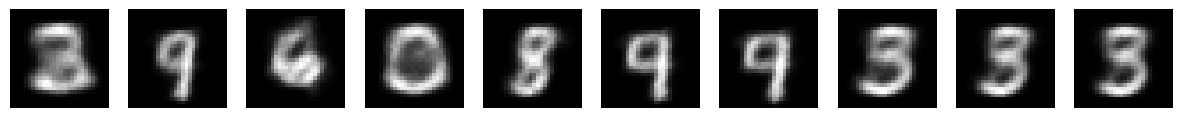


##################################################
VAE-MLP Epoch [2/5], Loss: 157.00779444986978
Sample Images:


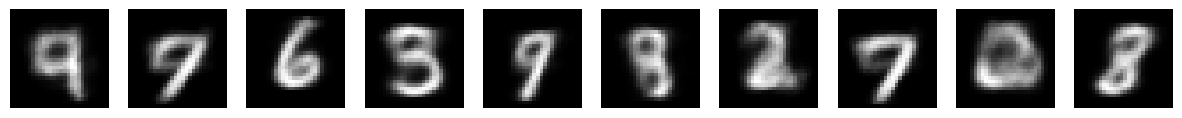


##################################################
VAE-MLP Epoch [3/5], Loss: 153.74175740559895
Sample Images:


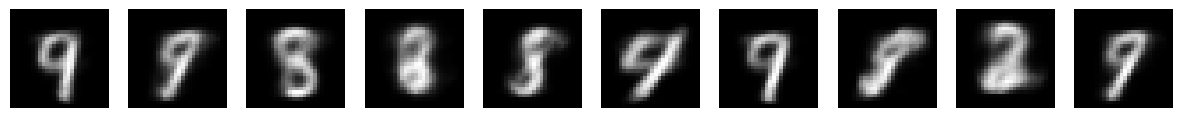


##################################################
VAE-MLP Epoch [4/5], Loss: 151.95499194335937
Sample Images:


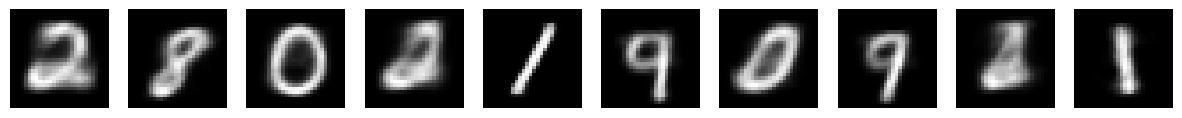


##################################################
VAE-MLP Epoch [5/5], Loss: 150.01700747070313
Sample Images:


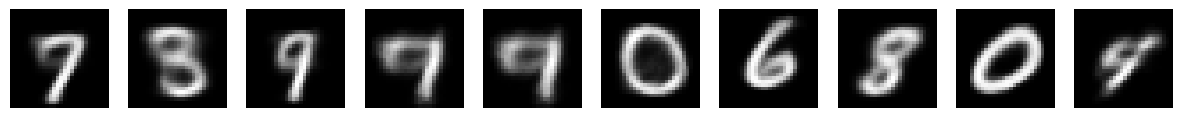

Best model saved as 'best_vae_mlp_model.pth'

##################################################
VAE-MLP Epoch [1/5], Loss: 146.12261412760418
Sample Images:


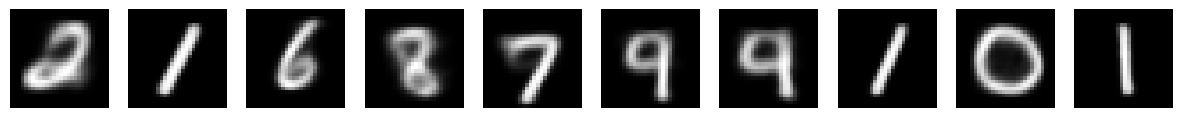


##################################################
VAE-MLP Epoch [2/5], Loss: 145.19734915364583
Sample Images:


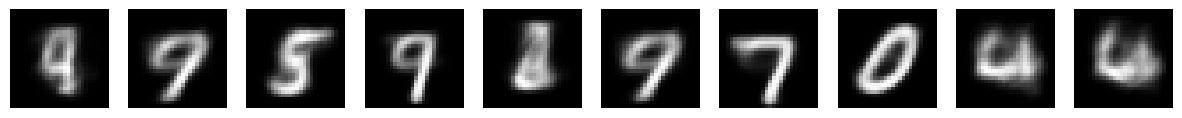


##################################################
VAE-MLP Epoch [3/5], Loss: 144.72979309895834
Sample Images:


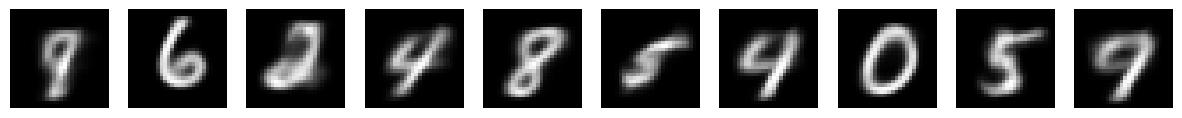


##################################################
VAE-MLP Epoch [4/5], Loss: 144.26072833658853
Sample Images:


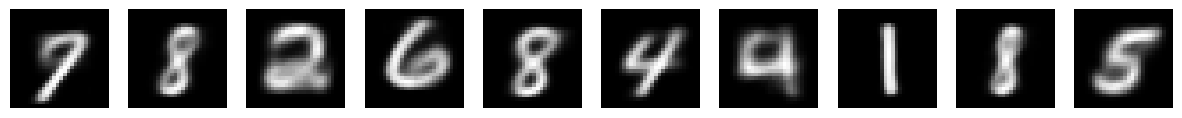


##################################################
VAE-MLP Epoch [5/5], Loss: 144.0828831217448
Sample Images:


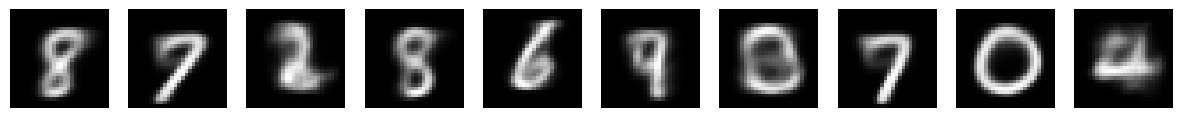

Best model saved as 'best_vae_mlp_model.pth'


In [18]:
# Train VAE-MLP
latent_dim = 2
vae_mlp = VAE_MLP(784, 512, latent_dim)
train_vae_mlp(vae_mlp, train_loader, num_epochs=5, learning_rate=0.005)
train_vae_mlp(vae_mlp, train_loader, num_epochs=5, learning_rate=0.001)

# 2) CVAE --> MLP

In [20]:
# Define a simple CVAE class with MLP architecture

# class CVAE_MLP(nn.Module):
#     def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
#         super(CVAE_MLP, self).__init__()
#         # TODO: Define the architecture of the encoder
#         self.encoder = nn.Sequential(
#             # TODO: Add layers for the encoder
#         )
#         self.fc_mu = None
#         self.fc_logvar = None
#         self.fc_class = None

#         # TODO: Define the architecture of the decoder
#         self.decoder = nn.Sequential(
#             # TODO: Add layers for the decoder
#         )

#     def reparameterize(self, mu, logvar):
#         # TODO: Implement the reparameterization trick
#         pass

#     def forward(self, x, y):
#         x = x.view(x.size(0), -1)
#         y = y.view(y.size(0), -1)

#         # TODO: Concatenate x and y before passing them to the encoder
#         x = None

#         # TODO: Implement the forward pass
#         hidden = None
#         mu = None
#         logvar = None
#         z = None
#         class_logits = None

#         reconstructed = None

#         return reconstructed, mu, logvar, class_logits

class CVAE_MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_classes):
        super(CVAE_MLP, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
            
        )

        # Latent space layers
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.fc_class = nn.Linear(hidden_dim, num_classes)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + num_classes, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Sigmoid activation for the output to represent probabilities
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, y):
        x = x.view(x.size(0), -1)
        y = y.view(y.size(0), -1)

        # Concatenate x and y before passing them to the encoder
        x = torch.cat([x, y], dim=1)

        # Encoder
        hidden = self.encoder(x)

        # Latent space
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        z = self.reparameterize(mu, logvar)
        class_logits = self.fc_class(hidden)

        # Concatenate z and y before passing them to the decoder
        zy = torch.cat([z, y], dim=1)

        # Decoder
        reconstructed = self.decoder(zy)

        return reconstructed, mu, logvar, class_logits

In [21]:
# Define CVAE loss function
# def cvae_loss(recon, data, mu, logvar, class_logits, labels):
#     # TODO: Flatten the data tensor
#     data = None

#     # TODO: Implement the reconstruction loss
#     reconstruction_loss = None

#     # TODO: Implement the KL divergence loss
#     kl_divergence = None

#     # TODO: Implement the cross-entropy loss for class prediction
#     ce_loss = None

#     # TODO: Return the total loss as the sum of reconstruction, KL divergence, and cross-entropy losses
#     return None


def cvae_loss(recon, data, mu, logvar, class_logits, labels):
    # Flatten the data tensor
    data = data.view(-1, 784)

    # Reconstruction Loss (binary cross-entropy for image data)
    reconstruction_loss = F.binary_cross_entropy(recon, data, reduction='sum')

    # KL Divergence Loss
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Cross-Entropy Loss for class prediction
    ce_loss = F.cross_entropy(class_logits, labels, reduction='sum')

    # Total Loss (sum of reconstruction, KL divergence, and cross-entropy losses)
    total_loss = reconstruction_loss + kl_divergence + ce_loss

    return total_loss

In [22]:
# Training Loop - CVAE (MLP)
# def train_cvae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
#     model.train()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     best_loss = float('inf')  # Initialize with a high value
#     best_model = None

#     for epoch in range(num_epochs):
#         print()
#         print(50 * "#")
#         total_loss = 0
#         for batch_idx, (data, labels) in enumerate(train_loader):
#             optimizer.zero_grad()
#             # One-hot encode the labels
#             labels_one_hot = None
#             # TODO: Forward pass through the model and calculate the loss using cvae_loss
#             recon = None
#             mu = None
#             logvar = None
#             class_logits = None
#             loss = None

#             # TODO: Backpropagation and optimization step
#             None

#             total_loss = None

#         avg_loss = None
#         print(f'CVAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

#         # Show some sample images after each epoch
#         if (epoch + 1) % 1 == 0:
#             print("Sample Images:")
#             with torch.no_grad():
#                 num_classes = 10  # Number of classes (0 to 9)
#                 num_samples_per_class = 1  # One sample per class
#                 # Generate random samples
#                 z = torch.randn(num_classes * num_samples_per_class, 2)
#                 # Generate one-hot encoded class labels
#                 y = torch.eye(num_classes).repeat(num_samples_per_class, 1)
#                 # Concatenate the random samples and class labels before passing them to the decoder
#                 sample = torch.cat([z, y], dim=1)
#                 sample = model.decoder(sample).view(num_classes * num_samples_per_class, 1, 28, 28)
#                 sample = sample.squeeze().cpu()
#                 fig, axs = plt.subplots(1, num_classes, figsize=(15, 2))
#                 for i in range(num_classes):
#                     axs[i].imshow(sample[i], cmap='gray')
#                     axs[i].set_title(f"Class {i}", fontsize=16)
#                     axs[i].axis('off')
#                 plt.show()

#         # TODO: Save the best model based on loss
#         if avg_loss < best_loss:
#             best_loss = avg_loss
#             best_model = None

#     # TODO: Save the best model to a file
#     None
#     print("Best model saved as 'best_cvae_mlp_model.pth'")


def train_cvae_mlp(model, train_loader, num_epochs=10, learning_rate=1e-3):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_loss = float('inf')  # Initialize with a high value
    best_model = None

    for epoch in range(num_epochs):
        print()
        print(50 * "#")
        total_loss = 0
        for batch_idx, (data, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            data = data.to(device)
            labels = labels.to(device)
            # One-hot encode the labels
            num_classes = 10  # Assuming 10 classes (adjust as needed)
            labels_one_hot = F.one_hot(labels, num_classes).float()

            # Forward pass through the model and calculate the loss using cvae_loss
            recon, mu, logvar, class_logits = model(data, labels_one_hot)
            loss = cvae_loss(recon, data, mu, logvar, class_logits, labels)

            # Backpropagation and optimization step
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'CVAE-MLP Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss}')

        # Show some sample images after each epoch
        if (epoch + 1) % 1 == 0:
            print("Sample Images:")
            with torch.no_grad():
                num_samples_per_class = 1  # One sample per class
                # Generate random samples
                z = torch.randn(num_classes * num_samples_per_class, latent_dim).to(device)

                # Concatenate the random samples and one-hot encoded class labels before passing them to the decoder
                labels_one_hot = torch.eye(num_classes).to(device)

                sample = torch.cat([z, labels_one_hot], dim=1)
                sample = model.decoder(sample).view(num_classes * num_samples_per_class, 1, 28, 28)
                sample = sample.squeeze().cpu()
                fig, axs = plt.subplots(1, num_classes, figsize=(15, 2))
                for i in range(num_classes):
                    axs[i].imshow(sample[i], cmap='gray')
                    axs[i].set_title(f"Class {i}", fontsize=16)
                    axs[i].axis('off')
                plt.show()

        # Save the best model based on loss
        if avg_loss < best_loss:
            best_loss = avg_loss
            best_model = model.state_dict()

    # Save the best model to a file
    torch.save(best_model, 'best_cvae_mlp_model.pth')
    print("Best model saved as 'best_cvae_mlp_model.pth'")



##################################################
CVAE-MLP Epoch [1/10], Loss: 159.80624661458333
Sample Images:


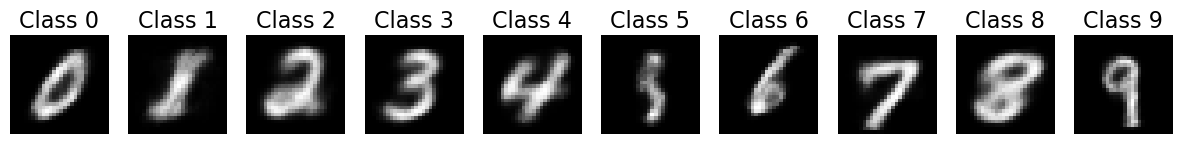


##################################################
CVAE-MLP Epoch [2/10], Loss: 139.43817420247396
Sample Images:


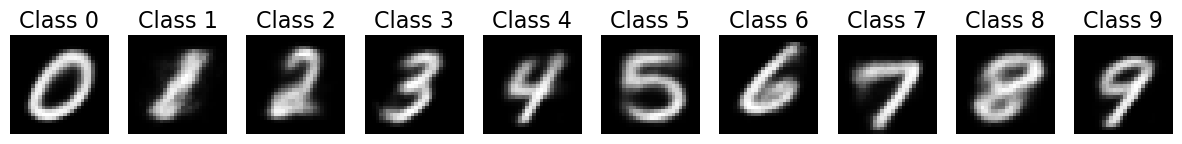


##################################################
CVAE-MLP Epoch [3/10], Loss: 137.27792083333333
Sample Images:


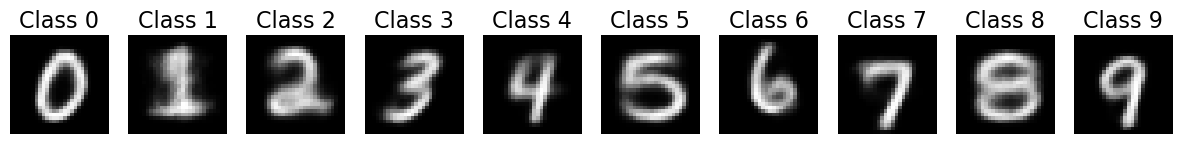


##################################################
CVAE-MLP Epoch [4/10], Loss: 135.90331321614585
Sample Images:


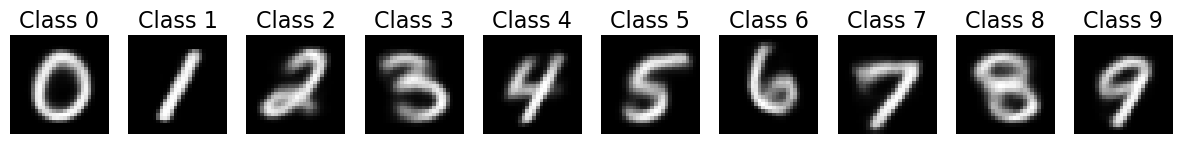


##################################################
CVAE-MLP Epoch [5/10], Loss: 135.16532587890626
Sample Images:


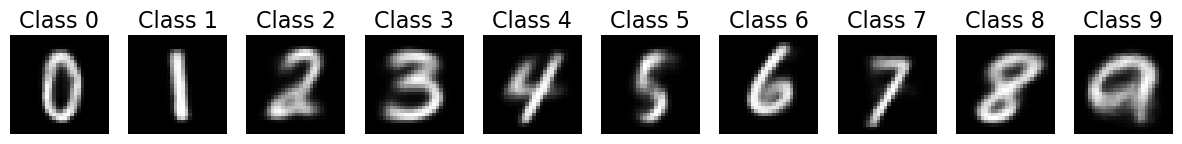


##################################################
CVAE-MLP Epoch [6/10], Loss: 134.50608986002604
Sample Images:


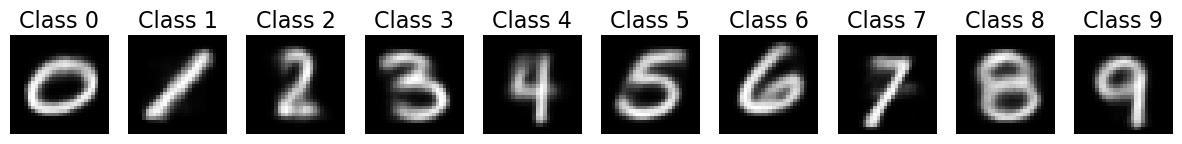


##################################################
CVAE-MLP Epoch [7/10], Loss: 134.06536791992187
Sample Images:


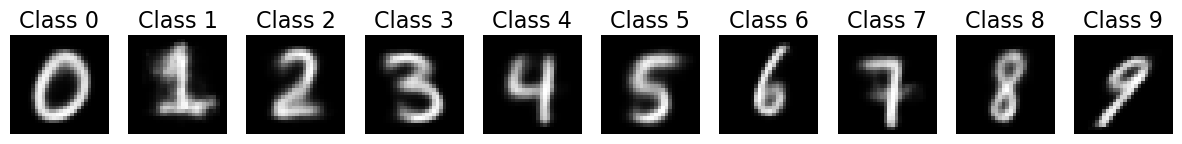


##################################################
CVAE-MLP Epoch [8/10], Loss: 133.68056536458334
Sample Images:


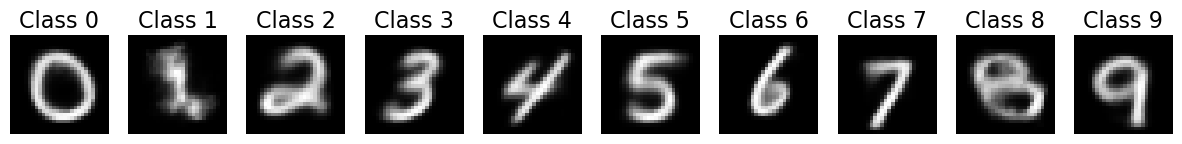


##################################################
CVAE-MLP Epoch [9/10], Loss: 133.41868470052083
Sample Images:


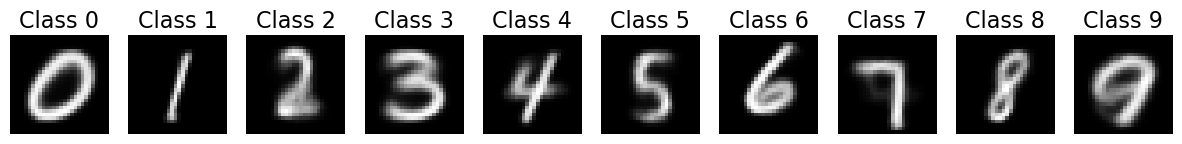


##################################################
CVAE-MLP Epoch [10/10], Loss: 133.1150762532552
Sample Images:


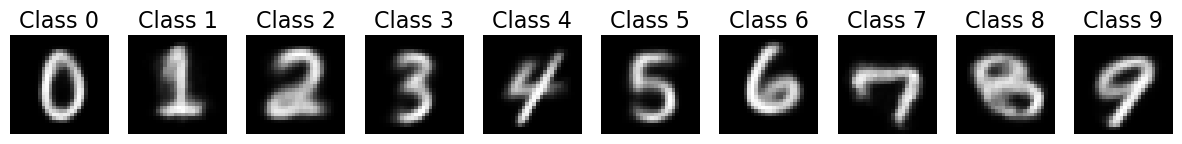

Best model saved as 'best_cvae_mlp_model.pth'


In [23]:
input_dim = 784  # Example input dimension (adjust as needed)
hidden_dim = 512  # Example hidden layer dimension (adjust as needed)
latent_dim = 2   # Example latent space dimension (adjust as needed)
num_classes = 10  # Example number of classes (adjust as needed)

cvae_mlp = CVAE_MLP(input_dim, hidden_dim, latent_dim, num_classes)
train_cvae_mlp(cvae_mlp, train_loader, num_epochs=10, learning_rate=0.004)

# 3) Visualizing Latent Space Distribution in Two Models

In this section, we will visualize the latent space distribution for two different models:

## Latent Space Distribution:

### VAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in VAE model.
2. Analyze the characteristics of the distribution.

### CVAE (MLP):

1. Visualize the latent space distribution using Multilayer Perceptron (MLP) in CVAE model.
2. Analyze the characteristics of the distribution.


Summarize your findings and draw conclusions based on the observed differences in the latent space distribution between VAE (MLP) and CVAE (MLP).


In [24]:
import seaborn as sns

def visualize_latent_space(model, num_samples=1000, num_classes=None, latent_dim=3):
    model.eval()

    # Generate random samples in the latent space
    if num_classes is None:
        z = torch.randn(num_samples, latent_dim)  # Assuming a 2D latent space
    else:
        # For CVAE, generate samples for each class separately
        z = []
        for i in range(num_classes):
            z_class = torch.randn(num_samples // num_classes, latent_dim)
            z.append(z_class)
        z = torch.cat(z, dim=0)

    # Decode the samples to generate data points in the input space
    with torch.no_grad():
        if num_classes is None:
            decoded_samples = model.decoder(z)
            print(decoded_samples.shape)
        else:
            # For CVAE, concatenate one-hot encoded class labels before passing to the decoder
            y = torch.eye(num_classes).repeat(num_samples // num_classes, 1)
            decoded_samples = model.decoder(torch.cat([z, y], dim=1))

    # Plot the latent space distribution
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=z[:, 0].numpy(), y=z[:, 1].numpy(), marker='o', hue=y.numpy() if num_classes is not None else None)
    plt.title('Latent Space Distribution')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.legend(title='Class' if num_classes is not None else None)
    plt.show()

    # # Plot the generated data points in the input space
    # plt.figure(figsize=(8, 6))
    # sns.scatterplot(x=decoded_samples[:, 0].numpy(), y=decoded_samples[:, 1].numpy(), marker='o', hue=y.numpy() if num_classes is not None else None)
    # plt.title('Generated Data Points in Input Space')
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.legend(title='Class' if num_classes is not None else None)
    # plt.show()

vae_mlp = CVAE_MLP(784, 256, 3, 10)
vae_mlp.load_state_dict(torch.load("best_cvae_mlp_model.pth"))
# # Visualize latent space distribution for VAE (MLP)
visualize_latent_space(vae_mlp, num_classes=10)

# # Visualize latent space distribution for CVAE (MLP)
# visualize_latent_space(cvae_mlp.to('device'), num_classes=10)


RuntimeError: Error(s) in loading state_dict for CVAE_MLP:
	size mismatch for encoder.0.weight: copying a param with shape torch.Size([512, 794]) from checkpoint, the shape in current model is torch.Size([256, 794]).
	size mismatch for encoder.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.2.weight: copying a param with shape torch.Size([512, 512]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for encoder.2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for encoder.4.weight: copying a param with shape torch.Size([512, 512]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for encoder.4.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc_mu.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([3, 256]).
	size mismatch for fc_mu.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([3]).
	size mismatch for fc_logvar.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([3, 256]).
	size mismatch for fc_logvar.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([3]).
	size mismatch for fc_class.weight: copying a param with shape torch.Size([10, 512]) from checkpoint, the shape in current model is torch.Size([10, 256]).
	size mismatch for decoder.0.weight: copying a param with shape torch.Size([512, 12]) from checkpoint, the shape in current model is torch.Size([256, 13]).
	size mismatch for decoder.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for decoder.2.weight: copying a param with shape torch.Size([512, 512]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for decoder.2.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for decoder.4.weight: copying a param with shape torch.Size([784, 512]) from checkpoint, the shape in current model is torch.Size([784, 256]).